The following is an exploratory analysis of the 2020/2021 English Premier League Dataset containing player statistics. This is also a practice on the steps included for Data Analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df = pd.read_csv("C:/Users/hp/Desktop/EPLDatasetAnalysis/Footballdataset.csv" ,encoding="unicode_escape")

In [3]:
#dataset description using .head()
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
df.describe

<bound method NDFrame.describe of                   Name              Club Nationality Position  Age  Matches  \
0          Mason Mount           Chelsea         ENG    MF,FW   21       36   
1        Edouard Mendy           Chelsea         SEN       GK   28       31   
2          Timo Werner           Chelsea         GER       FW   24       35   
3         Ben Chilwell           Chelsea         ENG       DF   23       27   
4          Reece James           Chelsea         ENG       DF   20       32   
..                 ...               ...         ...      ...  ...      ...   
527        Lys Mousset  Sheffield United         FRA    FW,MF   24       11   
528     Jack O'Connell  Sheffield United         ENG       DF   26        2   
529      Iliman Ndiaye  Sheffield United         FRA       MF   21        1   
530  Antwoine Hackford  Sheffield United         ENG    DF,FW   16        1   
531        Femi Seriki  Sheffield United         ENG       DF   17        1   

     Starts  Mins

In [5]:
df.tail()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.1,0,0
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.0,0,0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.0,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.0,0,0
531,Femi Seriki,Sheffield United,ENG,DF,17,1,0,1,0,0,0,-1.0,0,0,0.00,0.0,0,0


# Cleaning the dataset

In [8]:
# isnull() method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False.

df.isnull()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
528,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
530,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# we now use the isnull().sum() to count NaN values in Pandas DataFrame
df.isna().sum()


Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

having no NaN values in the dataframe, we can now proceed to the next phase our dataset is clean

# Data Exploration

In [10]:
#adding 2 new columns to the dataset to further explore
df ['MinsPerMatch'] = (df ['Mins'] / df['Matches']).astype(int)
df ['GoalsPerMatch'] = (df['Goals']/ df['Matches']).astype(float)
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [11]:
#We can find out the number of total goals in the entire season
Total_Goals = df['Goals'].sum()
print("There was a total of",Total_Goals)


There was a total of 986


In [12]:
#A pandas user-defined function (UDF)—also known as vectorized UDF—is a user-defined function that uses Apache Arrow to transfer data and pandas to work with the data.
def country(x):
 return df[df['Nationality'] == x][['Name','Position','Goals','MinsPerMatch','GoalsPerMatch' ]]


In [13]:
country('ENG')

,Name,Position,Goals,MinsPerMatch,GoalsPerMatch
0,Mason Mount,"MF,FW",6,80,0.166667
3,Ben Chilwell,DF,3,84,0.111111
4,Reece James,DF,1,74,0.031250
16,Tammy Abraham,FW,6,47,0.272727
18,Callum Hudson-Odoi,"FW,DF",2,46,0.086957
...,...,...,...,...,...
525,Phil Jagielka,DF,0,52,0.000000
526,Daniel Jebbison,FW,1,71,0.250000
528,Jack O'Connell,DF,0,90,0.000000
530,Antwoine Hackford,"DF,FW",0,11,0.000000


In [14]:
country('NED')

,Name,Position,Goals,MinsPerMatch,GoalsPerMatch
45,Nathan Aké,DF,1,79,0.100000
70,Donny van de Beek,"MF,FW",1,27,0.052632
75,Timothy Fosu-Mensah,DF,0,80,0.000000
83,Georginio Wijnaldum,MF,2,77,0.052632
100,Virgil van Dijk,DF,1,74,0.200000
173,Steven Bergwijn,"FW,MF",1,57,0.047619
222,Pascal Struijk,"DF,MF",1,76,0.037037
275,Anwar El Ghazi,FW,10,57,0.357143
333,Ki-Jana Hoever,DF,0,48,0.000000
352,Patrick van Aanholt,DF,0,80,0.000000


In [15]:
country('FRA')

,Name,Position,Goals,MinsPerMatch,GoalsPerMatch
6,N'Golo Kanté,MF,0,71,0.000000
9,Kurt Zouma,DF,5,84,0.208333
19,Olivier Giroud,FW,4,44,0.235294
42,Aymeric Laporte,DF,0,84,0.000000
44,Benjamin Mendy,DF,2,73,0.153846
60,Paul Pogba,"MF,FW",3,72,0.115385
62,Anthony Martial,FW,4,67,0.181818
78,Hannibal Mejbri,MF,0,9,0.000000
113,Wesley Fofana,DF,0,80,0.000000
146,Issa Diop,DF,2,76,0.111111


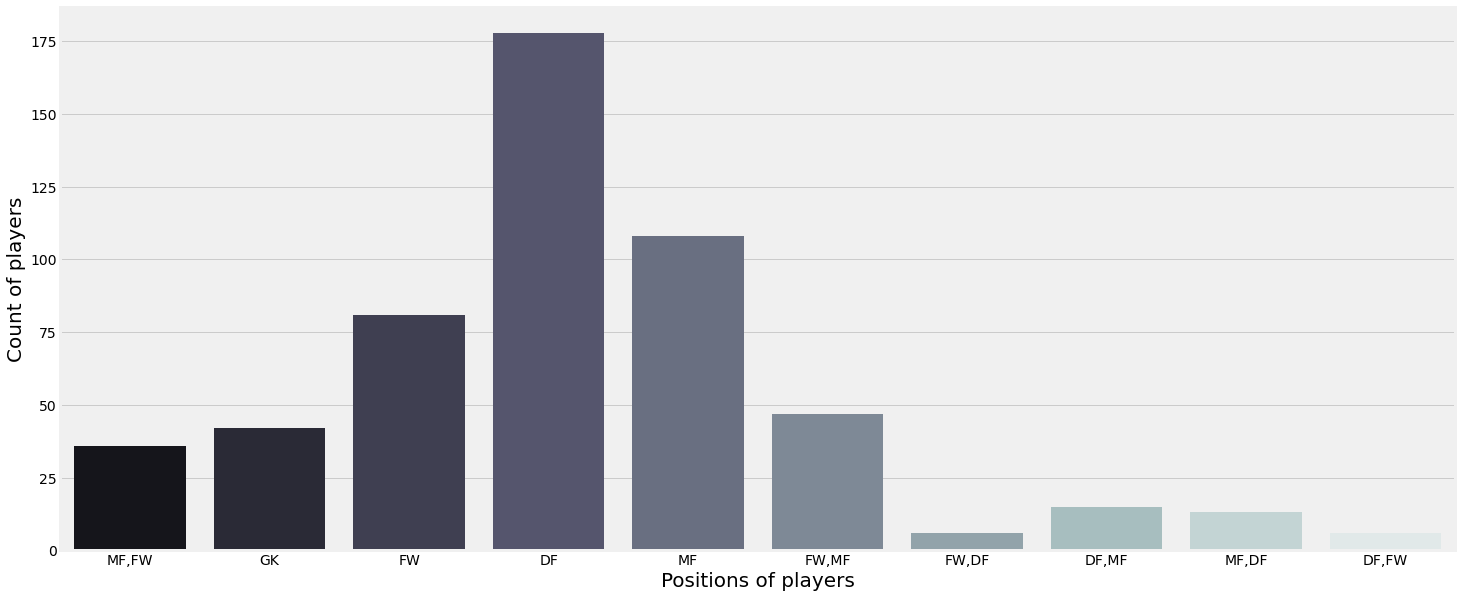

In [16]:
# different positions acquired by the players
plt.figure(figsize=(25,10))
plt.style.use('fivethirtyeight')
a=sns.countplot(df['Position'],palette='bone')
a.set_xlabel(xlabel='Positions of players',fontsize=20)
a.set_ylabel(ylabel='Count of players',fontsize=20)
plt.show()


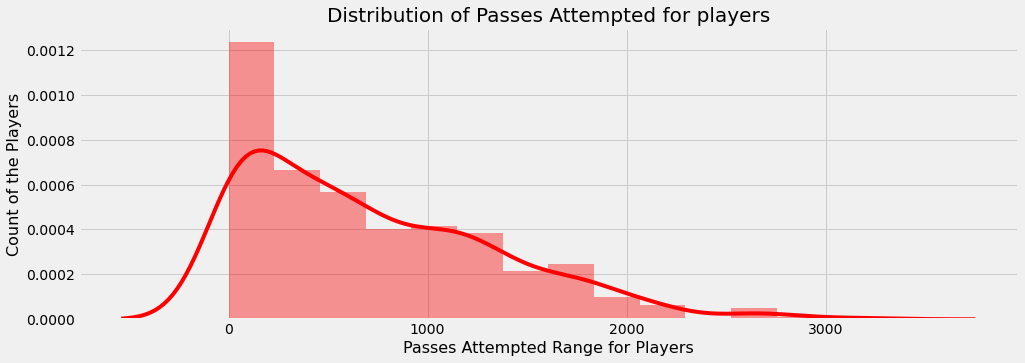

In [18]:
#comparing the players passes attempted
import warnings
warnings.filterwarnings('ignore')
#plt.rcParams['figure.figsize']=(15,5)
plt.figure(figsize=(15,5))
a=sns.distplot(df['Passes_Attempted'],color='Red')
a.set_xlabel('Passes Attempted Range for Players',fontsize=16)
a.set_ylabel('Count of the Players',fontsize=16)
a.set_title('Distribution of Passes Attempted for players',fontsize=20)
plt.show()


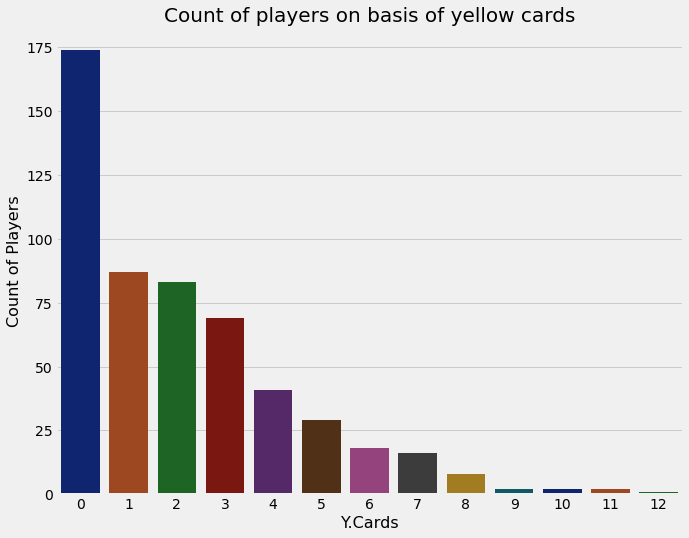

In [19]:
#comparing the players yellow card counts
plt.figure(figsize=(10,8))
p=sns.countplot(df['Yellow_Cards'],palette='dark')
p.set_title('Count of players on basis of yellow cards',fontsize=20)
p.set_xlabel(xlabel='Y.Cards',fontsize=16)
p.set_ylabel(ylabel='Count of Players',fontsize=16)
plt.show()


In [20]:
# best players per each position with their age, club, and nationality based on their xG
df.iloc[df.groupby(df['Position'])['xG'].idxmax()][['Position', 'Name',
 'Age', 'Club', 'Nationality']].style.background_gradient('Blues')

,Position,Name,Age,Club,Nationality
279,DF,Kortney Hause,25,Aston Villa,ENG
530,"DF,FW",Antwoine Hackford,16,Sheffield United,ENG
387,"DF,MF",Yan Valery,21,Southampton,FRA
110,FW,Jamie Vardy,33,Leicester City,ENG
418,"FW,DF",Andi Zeqiri,21,Brighton,SUI
339,"FW,MF",Patrick Cutrone,22,Wolverhampton Wanderers,ITA
1,GK,Edouard Mendy,28,Chelsea,SEN
51,MF,Bruno Fernandes,25,Manchester United,POR
401,"MF,DF",Pascal Groß,29,Brighton,GER
257,"MF,FW",Joshua King,28,Everton,NOR


In [21]:
# worst players per each position with their age, club, and nationality based on their xG
df.iloc[df.groupby(df['Position'])['xG'].idxmin()][['Position', 'Name',
 'Age', 'Club', 'Nationality']].style.background_gradient('Blues')


,Position,Name,Age,Club,Nationality
24,DF,Emerson Palmieri,25,Chelsea,ITA
255,"DF,FW",Niels Nkounkou,19,Everton,FRA
435,"DF,MF",Erik Pieters,31,Burnley,NED
23,FW,Ruben Loftus-Cheek,24,Chelsea,ENG
157,"FW,DF",Robert Snodgrass,32,West Ham United,SCO
158,"FW,MF",Felipe Anderson,27,West Ham United,BRA
1,GK,Edouard Mendy,28,Chelsea,SEN
78,MF,Hannibal Mejbri,17,Manchester United,FRA
228,"MF,DF",Jamie Shackleton,20,Leeds United,ENG
393,"MF,FW",Caleb Watts,18,Southampton,AUS


In [22]:
#Countries with most number of players
df['Nationality'].value_counts().head(10)

ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
POR     21
SCO     20
NED     16
WAL     12
BEL     11
Name: Nationality, dtype: int64

In [25]:
df['Position'].value_counts().head(10)

DF       178
MF       108
FW        81
FW,MF     47
GK        42
MF,FW     36
DF,MF     15
MF,DF     13
FW,DF      6
DF,FW      6
Name: Position, dtype: int64

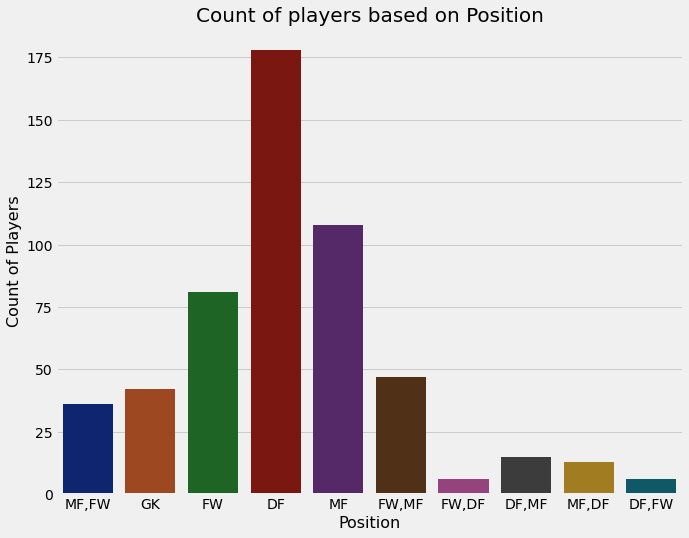

In [28]:
plt.figure(figsize=(10,8))
p=sns.countplot(df['Position'],palette='dark')
p.set_title('Count of players based on Position',fontsize=20)
p.set_xlabel(xlabel='Position',fontsize=16)
p.set_ylabel(ylabel='Count of Players',fontsize=16)
plt.show()

Text(0.5, 1.0, 'Violin Plot')

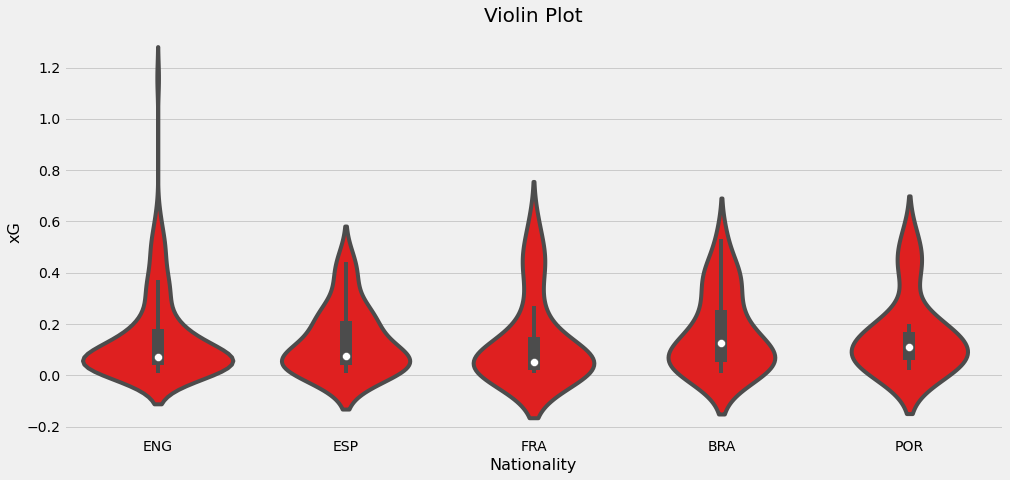

In [29]:
# Every Nations' Player and their xG
plt.rcParams['figure.figsize']=(15,7)
countriesl=['ENG','FRA','ENG','BRA','ESP','POR']
df_countries=df.loc[df['Nationality'].isin(countriesl) & df['xG']]
a=sns.violinplot(x=df_countries['Nationality'],y=df_countries['xG'],color='red')
a.set_xlabel(xlabel='Nationality',fontsize=16)
a.set_ylabel(ylabel='xG',fontsize=16)
a.set_title(label='Violin Plot',fontsize=20)


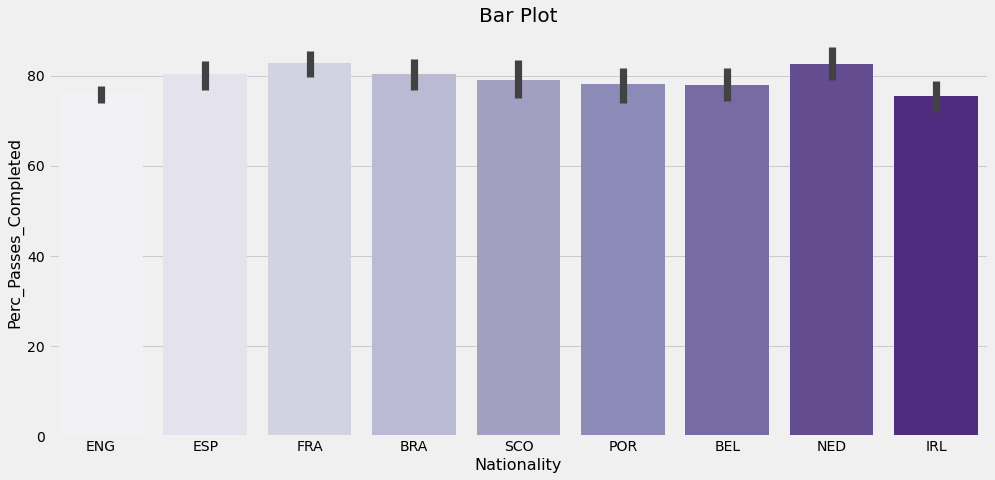

In [31]:
# Every Nations' Player and their Perc_Passes_Completed
plt.rcParams['figure.figsize']=(15,7)
countriesl=['ENG','ESP','BRA','POR','FRA','NED','SCO','IRL','BEL']
football_data_countries=df.loc[df['Nationality'].isin(countriesl) & df['Perc_Passes_Completed']]
a=sns.barplot(x=football_data_countries['Nationality'],y=football_data_countries['Perc_Passes_Completed'],palette='Purples')
a.set_xlabel(xlabel='Nationality',fontsize=16)
a.set_ylabel(ylabel='Perc_Passes_Completed',fontsize=16)
a.set_title(label='Bar Plot',fontsize=20)
plt.show()

I now want to find out whether age can influence a player's expected goals. i therefore posed the question and found the most suitable
algorithm to use.


# Can Age influence player performance through expected Goals?


I decided to carry out Bivariate Analysis using Age and other numerical variables to find patterns in the data and draw conclusions on whether age can influence player performance.


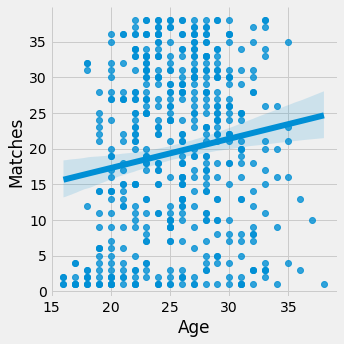

In [32]:

#I decided to explore age and the other columns
# comparing the performance of age and matches of footballers
sns.lmplot(x='Age',y='Matches', data = df)

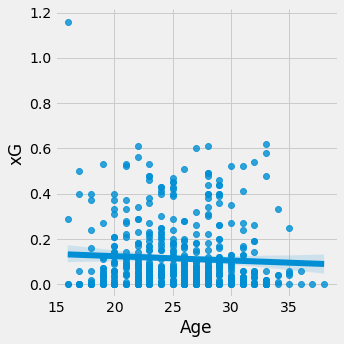

In [33]:
# comparing the performance of age and xG of footballers
sns.lmplot(x='Age',y='xG', data = df)

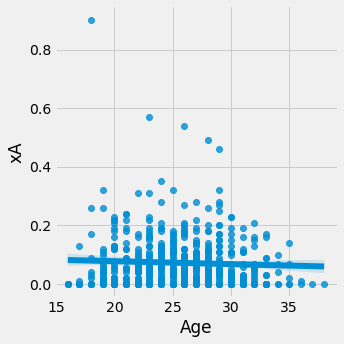

In [34]:
# comparing the performance of age and xA of footballers
sns.lmplot(x='Age',y='xA', data = df)

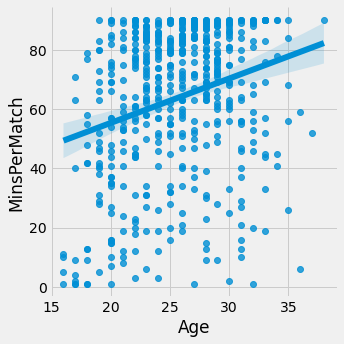

In [35]:
# comparing the performance of age and minutes per match of footballers
sns.lmplot(x='Age',y='MinsPerMatch', data = df)


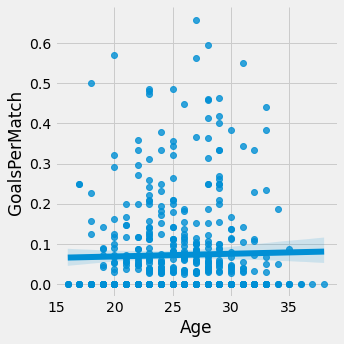

In [36]:
# comparing the performance of age and goals per match of footballers
sns.lmplot(x='Age',y='GoalsPerMatch', data = df)

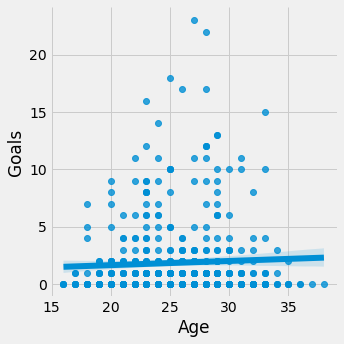

In [38]:

# comparing the performance of age and goals of footballers
sns.lmplot(x='Age',y='Goals', data = df)


In [43]:
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards', 'MinsPerMatch', 'GoalsPerMatch'],
      dtype='object')

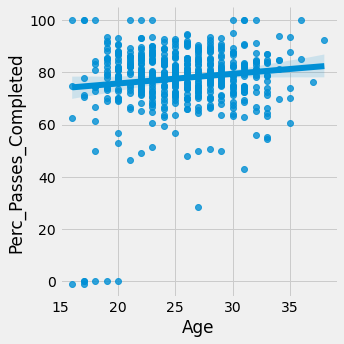

In [44]:
# comparing the performance of age and percentage of passes completed
sns.lmplot(x='Age',y='Perc_Passes_Completed', data = df)

In [42]:
MeanAge = df['Age'].mean()
print(MeanAge)

25.5


Elite athletes are getting older. We know that players can give their best performance levels for longer now than they could a few decades ago. Training has become more sophisticated, players take better care of themselves and science has helped to understand what we must do to make fewer mistakes. This season (2020/2021) the average age of players was 25.5

Additionally, from the relationship between age and matches played, we can see that as age increases, player involvement also increases. This might be because the technical-tactical performance appears to be better in older players. This can be further highlighted when the Percentage Passes Completed is compared to age, It is possible that the deterioration in physical performance of younger players is compensated by an improvement in other skills such as decision making and game intelligence.

The following are the training's immediate applications of these findings:

1.The finest recipe for success in a team of players may be the blend of youth and experience.

2.It would appear vital to individualize the players' training as much as possible based on their age because no two people require the same amount of training to become their greatest selves.

3.The requirements of the particular position must be taken into account when recruiting new players. Clubs may want to consider signing players of all ages. Older players should be signed when a greater understanding of the game is necessary, and younger players should be signed when a higher degree of physical performance is necessary. A football player with experience might also take less time to adjust to a new team and would give it their all right away.

4. This is something that should always be carefully considered. Every player is unique. Their needs must be adapted to.

# Linear Regression algorithm to find the probability that age can influence expected goals outcome of a player

In [45]:
#step 1 import the required modules
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [46]:
# we need to set our independent and dependent variables
y = df.xG
x = df.Age.values.reshape(-1,1)

In [47]:
print(x.shape , y.shape)


(532, 1) (532,)


In [48]:
model = LinearRegression().fit(x,y)

In [49]:
r_sq = model.score(x,y)
intercept = model.intercept_
slope = model.coef_


In [50]:
print(r_sq)


0.0031469845589144896


In [52]:
# after finding the coefficient of determination, we can now find the percentage 
PercentageCoef = r_sq * 100
print('The Percentage of R squared is:',PercentageCoef)

The Percentage of R squared is: 0.31469845589144896


In [53]:
y_pred = intercept + slope* x


Text(0.5, 1.0, 'Evaluating the relationship between age and expected goals of premier league players')

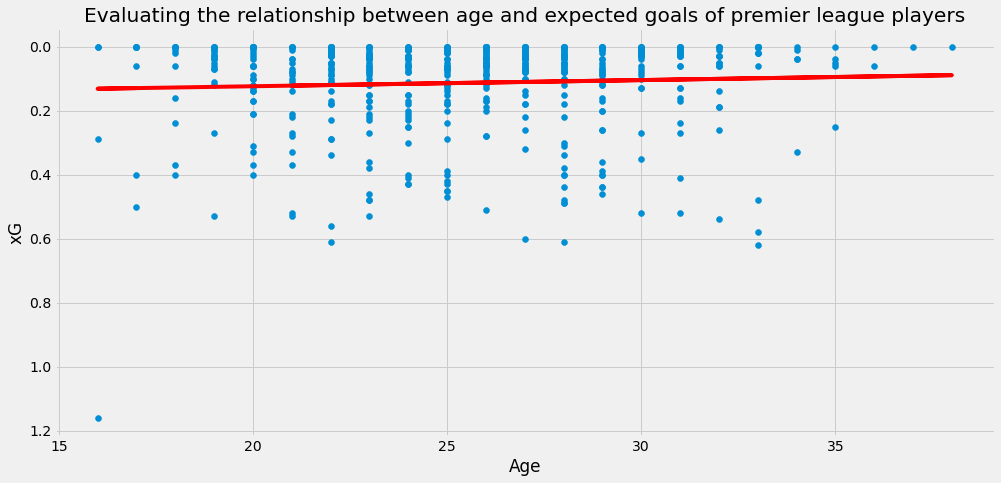

In [55]:
# fig, ax = plt.subplots(figsize = (10,10))
# next we are going to create a scatterplot
plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.gca().invert_yaxis()
plt.xlabel('Age')
plt.ylabel('xG')
plt.title('Evaluating the relationship between age and expected goals of premier league players')

In conclusion, the study indicates R^2 of the study to be 0.3% after using Linear Regression. This means that age doesn't influence the
expected Goals of a premier league player, this is indicated in the scatterplot as players who are regarded to be in their prime years (18-30) can have a lower expected goal, and players on their 30s have also shown they can have a higher expected goal stat.
Additionally, we can see from the scatterplot that as age increases, the XG decreases therefore this can predict that the overal output of players as they age can decrease and is relative to their individuality. Therefore,This is something that should always be carefully considered. Every player is unique. Their needs must be adapted to.



# Limitations of the study:
-study included all premier league players, not regarding their playing position as a limiting factor. 

# Recommendations of the study:
Therefore, the study can be improved in future by considering player position for example assessing whether age can influence the expected goals of Premier League Fowards(CF).